In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

## Define constants to identify assets

In [2]:
# Symbols used in Yahoo Finance
SKEW = '^SKEW'

## Get prices

In [3]:
## 2 years ago
start_date = (datetime.today() + timedelta(-731)).strftime('%Y-%m-%d')

In [4]:
end_date = (datetime.today() + timedelta(1)).strftime('%Y-%m-%d')

In [5]:
ticker = yf.Ticker(SKEW)

In [6]:
daily_ohlc = ticker.history(start=start_date, end=end_date, interval="1d")

D:\Users\steve\anaconda3\envs\my_quant_lab3\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [7]:
daily_ohlc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-02-14 00:00:00-05:00,128.119995,128.119995,128.119995,128.119995,0,0.0,0.0
2022-02-15 00:00:00-05:00,129.759995,129.759995,129.759995,129.759995,0,0.0,0.0
2022-02-16 00:00:00-05:00,132.750000,132.750000,132.750000,132.750000,0,0.0,0.0
2022-02-17 00:00:00-05:00,131.309998,131.309998,131.309998,131.309998,0,0.0,0.0
2022-02-18 00:00:00-05:00,128.360001,128.360001,128.360001,128.360001,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-08 00:00:00-05:00,150.360001,150.360001,150.360001,150.360001,0,0.0,0.0
2024-02-09 00:00:00-05:00,156.619995,156.619995,156.619995,156.619995,0,0.0,0.0
2024-02-12 00:00:00-05:00,152.800003,152.800003,152.800003,152.800003,0,0.0,0.0


## Calculate rolling percentile with one-year lookback

In [8]:
daily_ohlc['skew_rank'] = daily_ohlc['Close'].rolling(252).rank()
daily_ohlc['skew_percentile'] = daily_ohlc['skew_rank'] / 252

In [9]:
# Drop the initial lookback period from the result set
skew_history = daily_ohlc[['Close', 'skew_rank', 'skew_percentile']].dropna()

In [10]:
skew_history

,Close,skew_rank,skew_percentile
Date,,,
2023-02-23 00:00:00-05:00,121.849998,140.0,0.555556
2023-02-24 00:00:00-05:00,121.220001,123.0,0.488095
2023-02-27 00:00:00-05:00,120.540001,108.0,0.428571
2023-02-28 00:00:00-05:00,120.010002,95.0,0.376984
2023-03-01 00:00:00-05:00,118.889999,71.0,0.281746
...,...,...,...
2024-02-08 00:00:00-05:00,150.360001,236.0,0.936508
2024-02-09 00:00:00-05:00,156.619995,248.0,0.984127
2024-02-12 00:00:00-05:00,152.800003,241.0,0.956349


<Axes: xlabel='Date'>

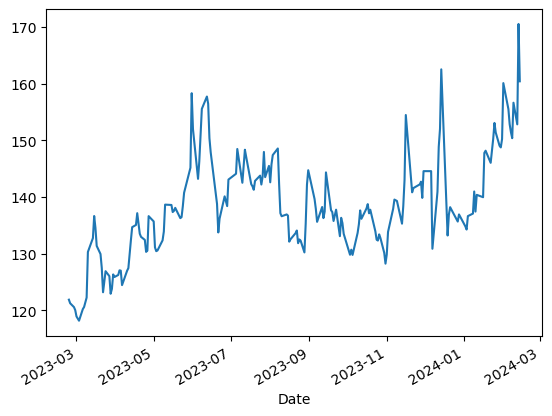

In [11]:
skew_history['Close'].plot()

<Axes: xlabel='Date'>

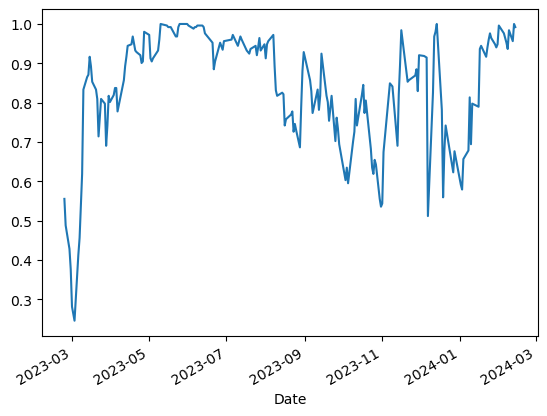

In [12]:
skew_history['skew_percentile'].plot()